# Project: Investigate a Dataset - [TMDb Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
The TMDb dataset.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
1.Which genres are most popular from year to year?
2.What kinds of properties are associated with movies that have high revenues? 
3.What are the properties of movies that have high average votes?
4.Is the budget any inclination of expected revenue?
5.What movie had the highest and lowest budget for each year?

In [3]:
# set up import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#'magic word' so that visualizations are plotted inline with the notebook
%matplotlib inline


# Data Wrangling
 Here I load the selected data,check for cleaniness and then trim and clean the data to prepare it for analysis

In [4]:
#load data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


_checking the first 3 rows of the dataset after loading it into a data frame to have a general idea of what the dataset looks like and the appropraite wrangling steps to be taken_

In [5]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


_this shows the last 5 rows of the dataset_

In [6]:
#check for the shape of the dataset
df.shape

(10866, 21)

There is a total of  10866 rows and 21 column

In [7]:
#check for information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

_checking the information of the dataset which shows the number of rows,columns, null values and datatypes. Some columns do not have the complete number of rows which means that they contain missing values which will be cleaned later on. There are four columns with datatypes float, 6 Integer datatypes and 11 string column datatypes._

In [8]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The datatypes of the columns 

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

_obtaining the sum of null values for each column. There are 10 columns with missing values. 'homepage' has the highest amount og missing values while imdb_id has the fewest. The other columns do not contain any missing values._

In [10]:
sum(df.duplicated())

1

_there is a total of just one duplicated row_

### Observation
There are 10866 rows and 21 columns.
A total of 9 columns have missing values and these would be fix when cleaning the data.
There is duplicated row.
The "release_date" column datatype should be datetime and not object.

There are some columns that will not be useful in the analysis such as 
'budget_adj','revenue_adj','overview','tagline','homepage','imdb_id',and 'keywords'. These columns will be put into a list and removed. The dataframe will also be cleaned by dropping duplicated rows and rows with missing values


### data cleaning
The errors recoreded above will be cleaned in this section

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True)

_removing the dupliacate row and making the change permanent_

In [12]:
#changing the format of release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

_changing the format of the release date col;umn from string to datetime_

In [13]:
#removing the uneeded columns first by putting them into a list and then using the drop function
col_list = ['budget_adj','revenue_adj','overview','tagline','homepage','imdb_id','keywords']
df.drop(col_list, axis=1, inplace=True)


_After obsrving the dataset , i noticed that some columns would not be needed to perform analysis so I decided to remove said columns and make the dataset more concise by trimming it. The undesired columns were put into a list and then dropped using the drop function._

In [14]:
#removing the null values
df.dropna(inplace=True)

_deleting the null values_

In [15]:
#creating a new 'profit' column which is the difference between the budget and revenue
df['profit']=df['revenue']-df['budget']
df['profit']=df['profit'].apply(np.int64)

_It would make sense to know what movies and genres made the highest and lowest profits. Since this information wasnt provided, i decided to create a new column 'profits' by finding the differnce between the budget and revenue_

In [16]:
#checking to see that all the data is properly cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

_Now that i have confirmed that my data has been properly cleaned, i can now begin performing EDA to answer the questions posed._



# Exploratory Data Analysis

Here i will first create funtions that will be used in answering the questions posed before delving into exploring the data. The functions will help to prevent the repetition of code

In [17]:
#function to find the maximum and minimum values in a particular column by genre

def min_max_gen(col_name):
    '''this function takes a particular column as argument ,finds the index of the minimum and maximum values and returns the minimum and maximum values by genre'''
    
    #find the index of the lowest and highest values
    min_index = df[col_name].idxmin()
    max_index = df[col_name].idxmax()
    
    #select the highest and lowest values using the indices
    min_val = pd.DataFrame(df.loc[min_index,:])
    max_val = pd.DataFrame(df.loc[max_index,:])
    
    #view the results
    print('The genre with the highest '+col_name+' is:' ,df['genres'][max_index])
    print('The genre with the lowest '+col_name+' is:' ,df['genres'][min_index])
    
    return pd.concat([max_val,min_val],axis=1)

In [18]:
#find the genre with the highest budget
min_max_gen('budget')

The genre with the highest budget is: Adventure|Fantasy|Action|Western|Thriller
The genre with the lowest budget is: Mystery|Drama


,2244,30
id,46528,280996
popularity,0.25054,3.927333
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
production_companies,Boram Entertainment Inc.,BBC Films|See-Saw Films|FilmNation Entertainme...


In [19]:
min_max_gen('profit')

The genre with the highest profit is: Action|Adventure|Fantasy|Science Fiction
The genre with the lowest profit is: Adventure|Fantasy|Action|Western|Thriller


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


In [20]:
min_max_gen('popularity')

The genre with the highest popularity is: Action|Adventure|Science Fiction|Thriller
The genre with the lowest popularity is: Mystery|Comedy|Drama


,0,9977
id,135397,32082
popularity,32.985763,0.000188
budget,150000000,0
revenue,1513528810,0
original_title,Jurassic World,The Hospital
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,George C. Scott|Diana Rigg|Richard Dysart|Barn...
director,Colin Trevorrow,Arthur Hiller
runtime,124,103
genres,Action|Adventure|Science Fiction|Thriller,Mystery|Comedy|Drama
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Simcha Productions


In [21]:
#function to find the maximum and minimum values in a particular column by movie

def min_max_mov(col_name):
    '''this function takes a particular column as argument ,finds the index of the minimum and maximum values and returns the minimum and maximum values by movie'''
    
    #find the index of the lowest and highest values
    min_index = df[col_name].idxmin()
    max_index = df[col_name].idxmax()
    
    #select the highest and lowest values using the indices
    min_val = pd.DataFrame(df.loc[min_index,:])
    max_val = pd.DataFrame(df.loc[max_index,:])
    
    #view the results
    print('The movie with the highest '+col_name+' is:' ,df['original_title'][max_index])
    print('The movie with the lowest '+col_name+' is:' ,df['original_title'][min_index])
    
    return pd.concat([max_val,min_val],axis=1)

In [22]:
#find the movie with the  higest profit
min_max_mov('profit')

The movie with the highest profit is: Avatar
The movie with the lowest profit is: The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


In [23]:
min_max_mov('popularity')

The movie with the highest popularity is: Jurassic World
The movie with the lowest popularity is: The Hospital


,0,9977
id,135397,32082
popularity,32.985763,0.000188
budget,150000000,0
revenue,1513528810,0
original_title,Jurassic World,The Hospital
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,George C. Scott|Diana Rigg|Richard Dysart|Barn...
director,Colin Trevorrow,Arthur Hiller
runtime,124,103
genres,Action|Adventure|Science Fiction|Thriller,Mystery|Comedy|Drama
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Simcha Productions


The functions above can be used to determine what movies or genres had the highest and lowest budget, revenue, profits and votes.


In [24]:
#find the all time top five movies for a given column and plot this information on a bar chart

def top_5(col,size=5):
    ''' this function takes a colun name as argument, sorts in descending order and returns the five highest values of the column'''
    df_sorted = pd.DataFrame(df[col].sort_values(ascending=False))[:size]
    df_sorted['original_title']=df['original_title']
    
    #plot the bar chart
    #calculate the average
    col_avg = np.mean(df[col])
    sns.barplot(x=col,y='original_title',data=df_sorted,label=col)
    plt.axvline(col_avg,color='k',linestyle='--',label='mean')
    
    if (col=='profit' or 'revenue' or 'budget'):
        plt.xlabel(col.capitalize() + '(US Dollar)')
    else:
        plt.xlabel(col.capitalize())
    plt.ylabel('')
    plt.title('Top ' +str(size)+' movies according to :' + col.capitalize())
    plt.legend()

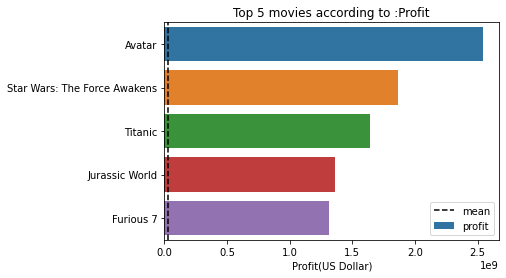

In [25]:
top_5('profit')

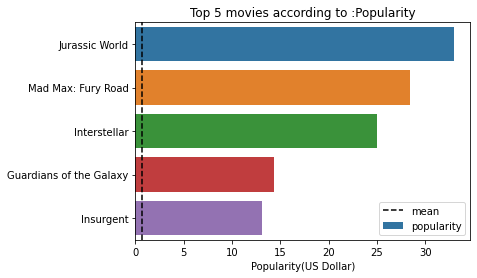

In [26]:
top_5('popularity')

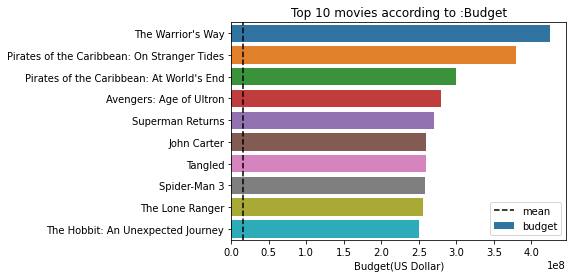

In [27]:
top_5('budget',size=10)

### Using the top_5 funtion we can see the five movies with the highest profits displayed abovw. this function can be used to find the movies with the highest budget , revenue, vote_average and the most popular movies. Avatar is the movie with the highest profit


In [28]:
#function to find the highest value of a given column for movies in a particular year
def best_by_year(col,size=15):
    '''this takes a column as argument and returns a bar chart of the highest movie in that column in a particular year and this is done for 10 consecutive years'''
    #sort the release year
    rel = df[['release_year', col,'original_title']].sort_values(['release_year',col,'original_title'],ascending=False)
    #group by release year
    rel = pd.DataFrame(rel.groupby(['release_year']).agg({col:[max,sum],'original_title':['first']})).tail(size)
    #select the max from the given column
    col_max = rel.iloc[:,0]
    #select the sum
    col_sum = rel.iloc[:,1]
    #select the title
    col_title= rel.iloc[:,2]
    #select the index
    rel_date = rel.index
    
    #plot
    from matplotlib import gridspec
    fig=plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,2,width_ratios=[4,2])
    ax0=plt.subplot(gs[0])
    ax0=sns.barplot(x=col_max,y=col_title,palette='deep')
    for i in range(len(rel_date)):
        #put the year information on the plot
        ax0.text(i,i*1.02,rel_date[i],fontsize=14,color='black')
    plt.title('Last ' +str(size)+ ' years highest ' +col+ ' for movies for each year')
    plt.xlabel(col.capitalize())
    plt.ylabel('')
    #plt.tight_layout()
    

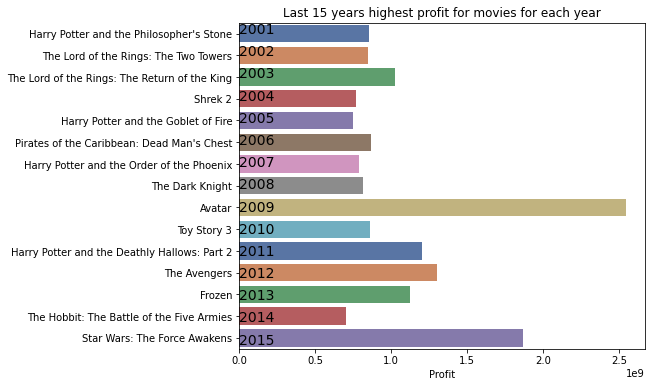

In [29]:
best_by_year('profit')

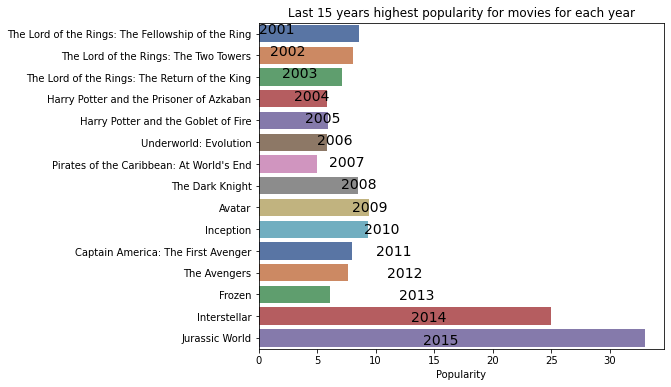

In [30]:
#most popular movies for each year
best_by_year('popularity')

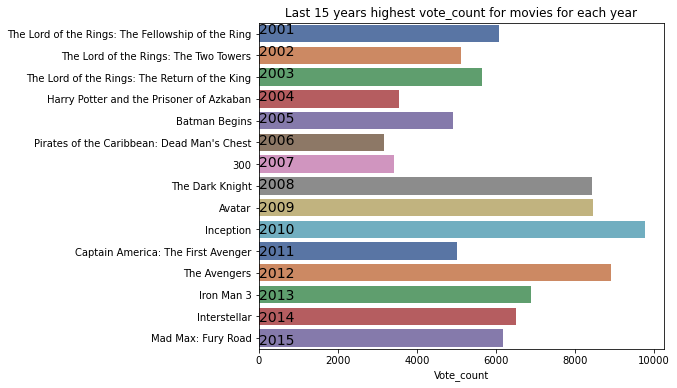

In [31]:
best_by_year('vote_count')


Finding the most filmed genres, the most popular cast member and the most popular direcctors


In [32]:
#function to find the above stated
from matplotlib import gridspec
def count_data(col,size=5):
    '''this function will take a column with string objects as argument
    from whiich the data will be split using the appropraite delimitter
    then extracted and plotted'''
    #separate the string in the given column by '|' and store the separated data
    data=df[col].str.cat(sep='|')
    data =pd.Series(data.split('|'))
    #count frequency of occurence of the individual data in given column
    count =data.value_counts(ascending=False)
    count_size=count.head(size)
    #naming the axis
    if(col=='production_companies'):
        sp=col.split('_')
        axis_name = sp[0].capitalize()+' '+sp[1].capitalize()
    else:
        axis_name = col.capitalize()
    #plot
    fig =plt.figure(figsize=(14,4))
    gs =gridspec.GridSpec(1,2,width_ratios =[6,2])
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The top '+str(size)+ ' most occuring ' +axis_name+ ' by Movie Count')
    


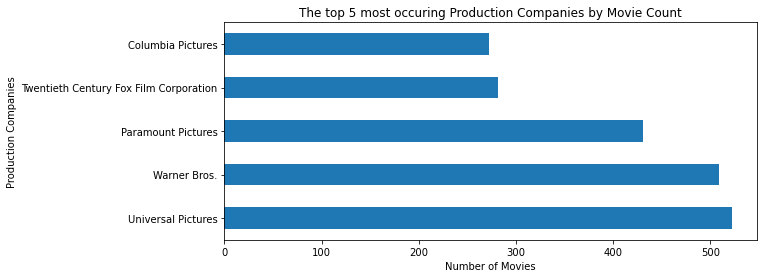

In [33]:
#the highest number for each production company to rank the top 5
count_data('production_companies')

_The most occuring production companies:Universl pictures is the most used production company_

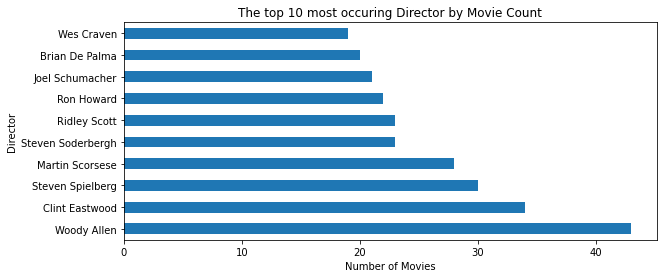

In [34]:
#most filmed director
count_data('director',size=10)

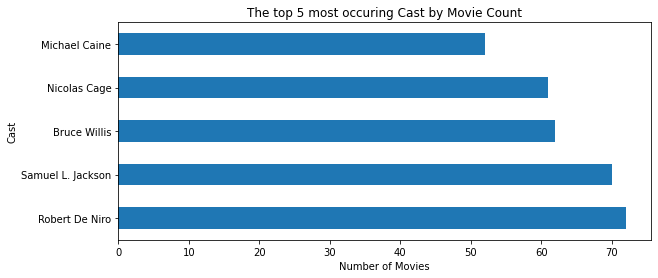

In [35]:
#the most filmed actors
count_data('cast')

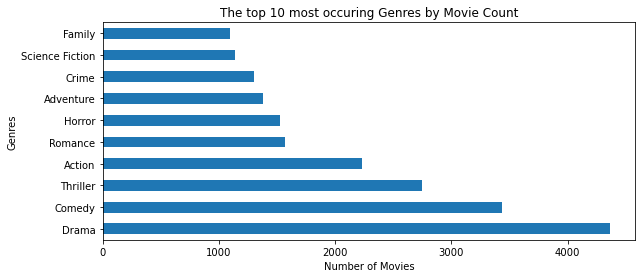

In [36]:
#the most filmed genres
count_data('genres',size=10)

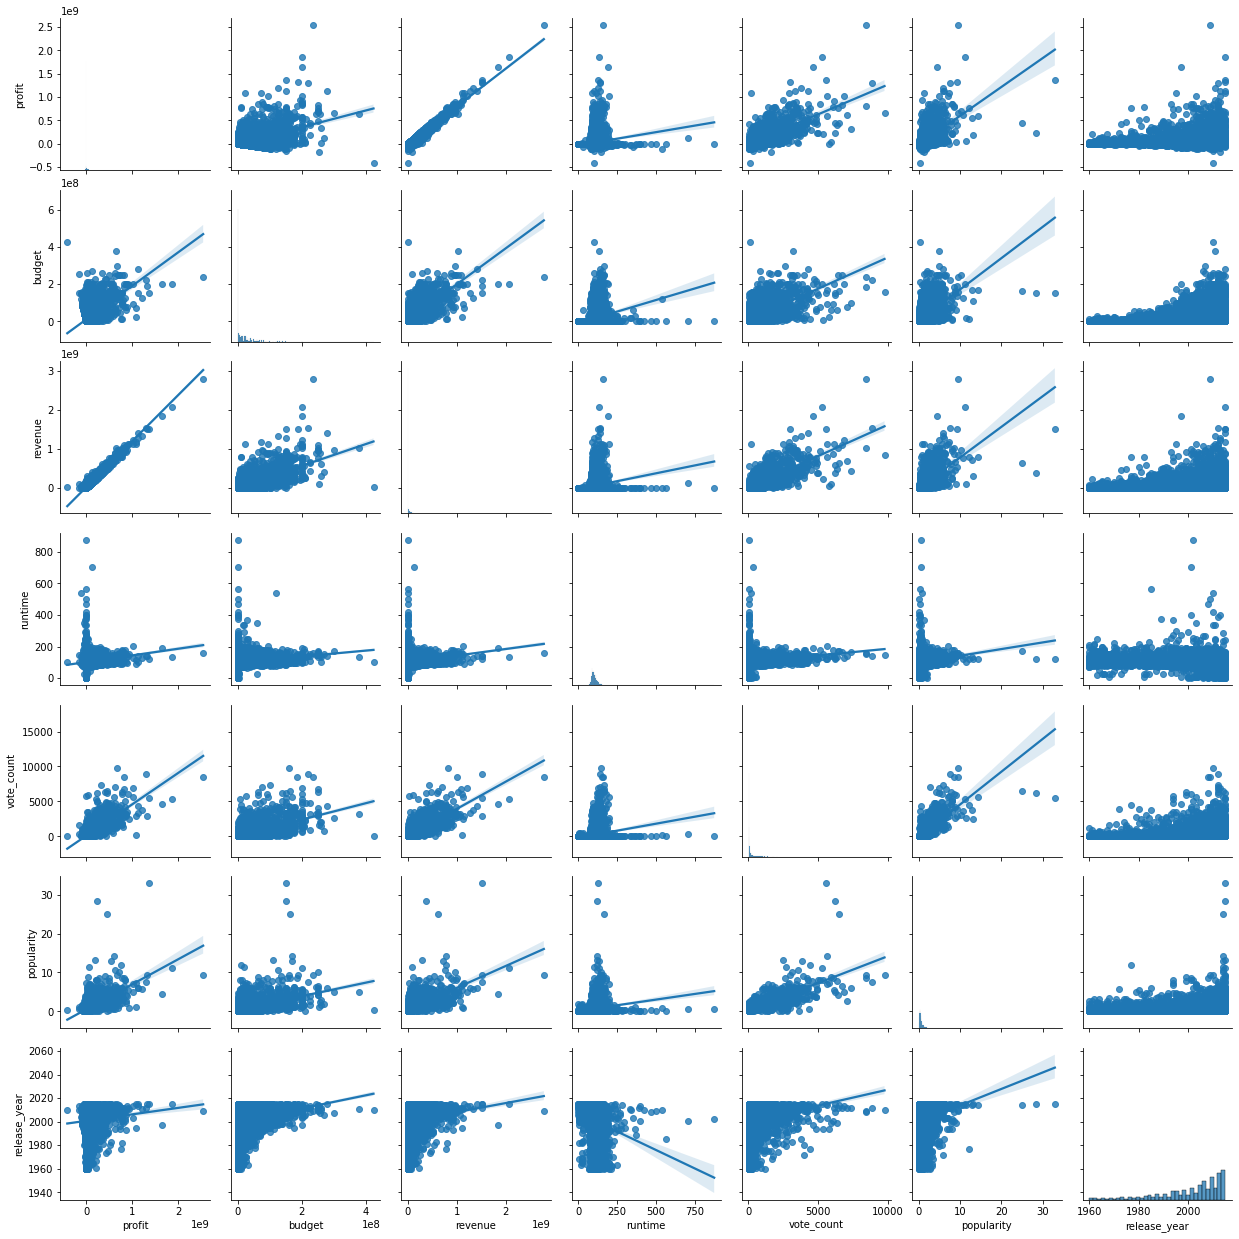

In [37]:
#check for correlation
df_relationship = df[['profit','budget','revenue','runtime','vote_count','popularity','release_year']]
sns.pairplot(df_relationship,kind='reg')

<AxesSubplot:xlabel='revenue', ylabel='budget'>

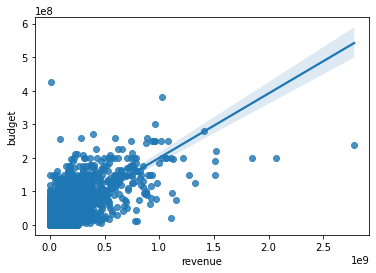

In [38]:
sns.regplot(x=df['revenue'],y=df['budget'])

relationship between revenue and budget

<AxesSubplot:xlabel='profit', ylabel='budget'>

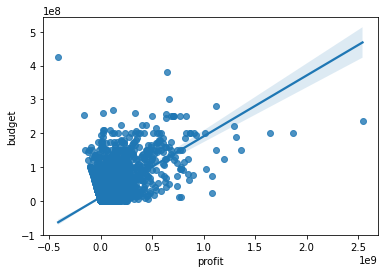

In [40]:
sns.regplot(x=df['profit'],y=df['budget'])

relationship between profit and budget

Let’s check out a few plots below:

1. Budget vs Revenue: Budget and revenue both have a positive correlation between them. Means there is a good possibility that movies with higher investments result in better revenues.
2. Profit Vs Budget: Profit And Budget both have a positive correlation between them. Means there is a good possibility that movies with higher investments result in better profit.
3. Release Year Vs Vote count: Release year and vote Average have a negative correlation. Means that movie ratings (vote count) do not depend on the release year.
4. Popularity Vs Profit: Popularity and profit have a positive correlation. It means that movie with high popularity tends to earn high profit.


<AxesSubplot:xlabel='popularity', ylabel='profit'>

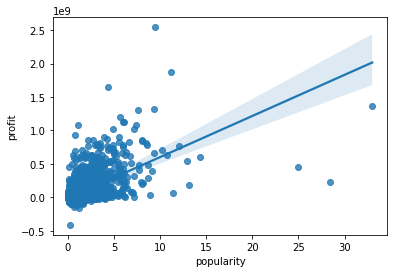

In [42]:
sns.regplot(x=df['popularity'],y=df['profit'])

Popularity Vs Profit: Popularity and profit have a positive correlation. It means that movie with high popularity tends to earn high profit.

## Conclusion
The most profitable movie is Avatar and filmed in 2009. Star Wars: The Force Awakers is second, and Titanic is the third one.
The least profitable movie is The Warrior’s Way and this movie also has the highest budget.
The most profitable genre is: Action|Adventure|Fantasy|Science Fiction
The genre with the lowest profit is adventure |Fantasy |Action | Western|Thriller
The most popular genres was  Drama, Comedy, and Action.
Correlation != causation


## Limatations 
limitations that prevent a broader analysis of the data set are:
There were  some missing values in the dataset affecting our results.
Incorrect datatypes had to be fixed
 


##### references
Ayse Bat via medium

Stack overflow